In [29]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the datasets
transaction_data = pd.read_excel(r"C:\Users\kuros\OneDrive\Desktop\Transaction_data.xlsx")
customer_feedback_data = pd.read_excel(r"C:\Users\kuros\OneDrive\Desktop\Customer_Feedback_Data.xlsx")
product_offering_data = pd.read_excel(r"C:\Users\kuros\OneDrive\Desktop\Product_Offering_Data.xlsx")

In [35]:
# Display first few rows of each dataset to see a quick overview
print("Transaction Data Overview:")
display(transaction_data.head())

print("Customer Feedback Data Overview:")
display(customer_feedback_data.head())

print("Product Offering Data Overview:")
display(product_offering_data.head())

Transaction Data Overview:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


Customer Feedback Data Overview:


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


Product Offering Data Overview:


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,5,Auto Loan,Loan,Medium,NaN,Medium
1,9,Business Loan,Loan,Medium,NaN,Medium
2,2,Gold Savings Account,Savings Account,Low,NaN,Low
3,2,Gold Savings Account,Savings Account,Low,NaN,Low
4,3,High-Yield Investment Account,Investment,High,NaN,High


In [37]:
# Get shape of each dataset - shows records (rows) and features (columns)
print("Transaction Data Shape:", transaction_data.shape)
print("Customer Feedback Data Shape:", customer_feedback_data.shape)
print("Product Offering Data Shape:", product_offering_data.shape)

Transaction Data Shape: (5050, 5)
Customer Feedback Data Shape: (5050, 4)
Product Offering Data Shape: (15, 6)


In [39]:
# Check duplicate counts for each dataset
print("Transaction Data Duplicates:", transaction_data.duplicated().sum())  
print("Customer Feedback Data Duplicates:", customer_feedback_data.duplicated().sum())  
print("Product Offering Data Duplicates:", product_offering_data.duplicated().sum()) 

Transaction Data Duplicates: 50
Customer Feedback Data Duplicates: 81
Product Offering Data Duplicates: 5


In [21]:
# 2. DATA CLEANING

In [41]:
# 2.1 Dropping Unimportant Features/Columns
# Drop the Target_Age_Group column from product_offering_data
product_offering_data = product_offering_data.drop(columns=['Target_Age_Group'])

# Verify that the column is removed
product_offering_data.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group
0,5,Auto Loan,Loan,Medium,Medium
1,9,Business Loan,Loan,Medium,Medium
2,2,Gold Savings Account,Savings Account,Low,Low
3,2,Gold Savings Account,Savings Account,Low,Low
4,3,High-Yield Investment Account,Investment,High,High


In [43]:
#Checks possible duplicate Transaction_ID from transaction_data
print("Transaction ID Duplicates:", transaction_data['Transaction_ID'].duplicated().sum()) 
#Checks possible duplicate Product_ID from product_offering_data
print("Product ID Duplicates:", product_offering_data['Product_ID'].duplicated().sum()) 

Transaction ID Duplicates: 50
Product ID Duplicates: 5


In [45]:
# 2.1 Handling Duplicate Rows
#Drop duplicate rows
transaction_data = transaction_data.drop_duplicates().reset_index(drop=True)
customer_feedback_data = customer_feedback_data.drop_duplicates().reset_index(drop=True)
product_offering_data = product_offering_data.drop_duplicates().reset_index(drop=True)

In [47]:
# 2.1 Handling Duplicate Rows
# Check if duplicates were removed
print("Transaction Data Duplicates:", transaction_data.duplicated().sum())  
print("Customer Feedback Data Duplicates:", customer_feedback_data.duplicated().sum())  
print("Product Offering Data Duplicates:", product_offering_data.duplicated().sum())  

Transaction Data Duplicates: 0
Customer Feedback Data Duplicates: 0
Product Offering Data Duplicates: 0


In [ ]:
# 2.3 Handling Outliers
# 2.3.1 Outlier Detection 
# 2.3.1.1 Transaction_data [‘Transaction_Amount’] 

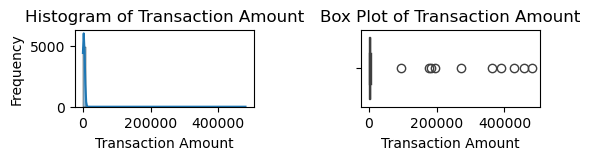

In [49]:
# 2.3.1.1.1 Histogram and Box Plot (checks outliers using the said tools)

# Create a figure with 1 row and 2 columns (side-by-side plots)
plt.figure(figsize=(6,1))  # Adjust figure size for better visibility

# ---- Histogram ----
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(transaction_data['Transaction_Amount'].dropna(), bins=50, kde=True, edgecolor='black')
plt.title('Histogram of Transaction Amount')  # Add title
plt.xlabel('Transaction Amount')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis

# ---- Box Plot ----
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x=transaction_data['Transaction_Amount'].dropna())
plt.title('Box Plot of Transaction Amount')  # Add title
plt.xlabel('Transaction Amount')  # Label x-axis

# Add more space between the two plots
plt.subplots_adjust(wspace=0.6)  # Increase horizontal space
plt.show()

In [51]:
# 2.3.1.1.1 Skewness & Kurtosis (Checks Skewness and Kurtosis) 
from scipy.stats import skew, kurtosis

skewness = skew(transaction_data['Transaction_Amount'].dropna())
kurt = kurtosis(transaction_data['Transaction_Amount'].dropna())

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurt}')

Skewness: 26.13073302175164
Kurtosis: 725.0827495949649


In [55]:
#Checks the maximum value from the Transaction_Amount
max_value = transaction_data['Transaction_Amount'].max()
print(f'Max Transaction Amount: {max_value}')

Max Transaction Amount: 480300.0


In [57]:
#IQR Method to remove Outliers
Q1 = transaction_data['Transaction_Amount'].quantile(0.25)
Q3 = transaction_data['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
transaction_data_cleaned = transaction_data[(transaction_data['Transaction_Amount'] >= lower_bound) & (transaction_data['Transaction_Amount'] <= upper_bound)]

# Print number of removed rows
print(f'Number of outliers removed: {transaction_data.shape[0] - transaction_data_cleaned.shape[0]}')

Number of outliers removed: 110


In [59]:
#2.3.3 Final Check for Outliers
# 2.3.3.1 Transaction_data [‘Transaction_Amount’] 
# 2.3.3.1.1 Skewness & Kurtosis 
# Optionally, check the new skewness (0.029 is good)

# Calculate skewness
new_skewness = skew(transaction_data_cleaned['Transaction_Amount'].dropna())

# Calculate kurtosis
new_kurtosis = kurtosis(transaction_data_cleaned['Transaction_Amount'].dropna())

# Print both values
print(f'New Skewness: {new_skewness}')
print(f'New Kurtosis: {new_kurtosis}')

New Skewness: 0.029269433568527462
New Kurtosis: -1.1940158284908649


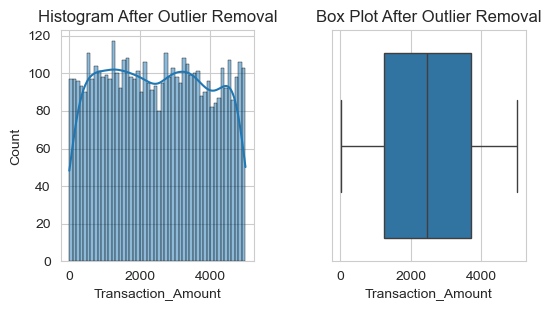

In [125]:
#2.3.3 Final Check for Outliers
# 2.3.3.1 Transaction_data [‘Transaction_Amount’] 
# 2.3.3.1.1 Histogram and Box Plot 
plt.figure(figsize=(6,3))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(transaction_data_cleaned['Transaction_Amount'], bins=50, kde=True, edgecolor='black')
plt.title('Histogram After Outlier Removal')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=transaction_data_cleaned['Transaction_Amount'])
plt.title('Box Plot After Outlier Removal')

plt.subplots_adjust(wspace=0.4)  # Adds more space between plots
plt.show()

In [61]:
#2.4 Handling Missing Data (CHECKING NULL VALUES)
print("TRANSACTION DATA:")
print(transaction_data.isna().sum())
print("=========================")
print("CUSTOMER FEEDBACK:")
print(customer_feedback_data.isna().sum())
print("=========================")
print("PRODUCT OFFERING:")
print(product_offering_data.isna().sum())
print("=========================")

TRANSACTION DATA:
Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64
CUSTOMER FEEDBACK:
Customer_ID                  0
Satisfaction_Score         100
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64
PRODUCT OFFERING:
Product_ID             0
Product_Name           0
Product_Type           0
Risk_Level             0
Target_Income_Group    0
dtype: int64


In [ ]:
#2.4 Handling Missing Data (REPLACING NULL VALUES)

In [63]:
# Fill missing values in Transaction_Amount with mean
transaction_data['Transaction_Amount'].fillna(transaction_data['Transaction_Amount'].mean(), inplace=True)

# Fill missing values in Satisfaction_Score with median
customer_feedback_data['Satisfaction_Score'].fillna(customer_feedback_data['Satisfaction_Score'].median(), inplace=True)

# Verify if there are still missing values
print("Missing values in transaction_data:\n", transaction_data.isnull().sum())
print("\nMissing values in customer_feedback_data:\n", customer_feedback_data.isnull().sum())

Missing values in transaction_data:
 Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Amount    0
Transaction_Type      0
dtype: int64

Missing values in customer_feedback_data:
 Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64


C:\Users\kuros\AppData\Local\Temp\ipykernel_9772\4215107819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction_data['Transaction_Amount'].fillna(transaction_data['Transaction_Amount'].mean(), inplace=True)
C:\Users\kuros\AppData\Local\Temp\ipykernel_9772\4215107819.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [65]:
print("Transaction Data Overview:")
display(transaction_data.head())

print("Customer Feedback Data Overview:")
display(customer_feedback_data.head())

print("Product Offering Data Overview:")
display(product_offering_data.head())

Transaction Data Overview:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase
1,2,826,2023-01-01 01:00:00,3102.050816,Bill Payment
2,3,916,2023-01-01 02:00:00,10.000000,Purchase
3,4,109,2023-01-01 03:00:00,72.000000,Investment
4,5,889,2023-01-01 04:00:00,1793.000000,Investment


Customer Feedback Data Overview:


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


Product Offering Data Overview:


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group
0,5,Auto Loan,Loan,Medium,Medium
1,9,Business Loan,Loan,Medium,Medium
2,2,Gold Savings Account,Savings Account,Low,Low
3,3,High-Yield Investment Account,Investment,High,High
4,4,Mortgage Loan,Loan,Medium,High


In [ ]:
#2.4 Scaling and Normalization

In [67]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features
transaction_data['Transaction_Amount_Scaled'] = scaler.fit_transform(transaction_data[['Transaction_Amount']])
customer_feedback_data[['Satisfaction_Score_Scaled', 'Likelihood_to_Recommend_Scaled']] = scaler.fit_transform(
    customer_feedback_data[['Satisfaction_Score', 'Likelihood_to_Recommend']]
)

# Encode categorical variables (Feedback_Comments, Risk_Level, Target_Income_Group)
label_enc = LabelEncoder()

customer_feedback_data['Feedback_Comments_Encoded'] = label_enc.fit_transform(customer_feedback_data['Feedback_Comments'])
product_offering_data['Risk_Level_Encoded'] = label_enc.fit_transform(product_offering_data['Risk_Level'])
product_offering_data['Target_Income_Group_Encoded'] = label_enc.fit_transform(product_offering_data['Target_Income_Group'])

In [135]:

# Verify the transformations
print(transaction_data[['Transaction_Amount', 'Transaction_Amount_Scaled']].head())
print(customer_feedback_data[['Satisfaction_Score', 'Satisfaction_Score_Scaled', 
                              'Likelihood_to_Recommend', 'Likelihood_to_Recommend_Scaled',
                              'Feedback_Comments', 'Feedback_Comments_Encoded']].head())
print(product_offering_data[['Risk_Level', 'Risk_Level_Encoded', 
                             'Target_Income_Group', 'Target_Income_Group_Encoded']].head())

   Transaction_Amount  Transaction_Amount_Scaled
0         3472.000000               2.509494e-02
1         3102.050816               3.084709e-17
2           10.000000              -2.097446e-01
3           72.000000              -2.055389e-01
4         1793.000000              -8.879747e-02
   Satisfaction_Score  Satisfaction_Score_Scaled  Likelihood_to_Recommend  \
0                10.0                   1.201245                        9   
1                 3.0                  -0.753968                        3   
2                10.0                   1.201245                        1   
3                 7.0                   0.363297                        4   
4                 8.0                   0.642613                        7   

   Likelihood_to_Recommend_Scaled  Feedback_Comments  \
0                        1.196284     Very satisfied   
1                       -0.896177     Very satisfied   
2                       -1.593664     Very satisfied   
3                  

In [ ]:
#3. FEATURE ENGINEERING

In [69]:
# 3.1 Features Removed
#Remove specified columns from each dataset
transaction_data.drop(columns=['Transaction_Amount'], inplace=True)
customer_feedback_data.drop(columns=['Satisfaction_Score', 'Feedback_Comments', 'Likelihood_to_Recommend'], inplace=True)
product_offering_data.drop(columns=['Risk_Level'], inplace=True)

# Display the first few rows of each dataset to confirm changes
print("Transaction Data:")
display(transaction_data.head())

print("Customer Feedback Data:")
display(customer_feedback_data.head())

print("Product Offering Data:")
display(product_offering_data.head())

Transaction Data:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Transaction_Amount_Scaled
0,1,393,2023-01-01 00:00:00,Purchase,2.509494e-02
1,2,826,2023-01-01 01:00:00,Bill Payment,3.084709e-17
2,3,916,2023-01-01 02:00:00,Purchase,-2.097446e-01
3,4,109,2023-01-01 03:00:00,Investment,-2.055389e-01
4,5,889,2023-01-01 04:00:00,Investment,-8.879747e-02


Customer Feedback Data:


,Customer_ID,Satisfaction_Score_Scaled,Likelihood_to_Recommend_Scaled,Feedback_Comments_Encoded
0,1,1.201245,1.196284,4
1,2,-0.753968,-0.896177,4
2,3,1.201245,-1.593664,4
3,4,0.363297,-0.547434,2
4,5,0.642613,0.498797,3


Product Offering Data:


,Product_ID,Product_Name,Product_Type,Target_Income_Group,Risk_Level_Encoded,Target_Income_Group_Encoded
0,5,Auto Loan,Loan,Medium,2,2
1,9,Business Loan,Loan,Medium,2,2
2,2,Gold Savings Account,Savings Account,Low,1,1
3,3,High-Yield Investment Account,Investment,High,0,0
4,4,Mortgage Loan,Loan,High,2,0


In [71]:
#3.2 Features Added

# Aggregate features at the Customer_ID level using the scaled transaction amount
customer_aggregated = transaction_data.groupby('Customer_ID').agg(
    Total_Transaction_Amount=('Transaction_Amount_Scaled', 'sum'),  # Using the scaled version
    Transaction_Frequency=('Transaction_ID', 'count')
).reset_index()

# Calculate Average_Transaction_Amount
customer_aggregated['Average_Transaction_Amount'] = (
    customer_aggregated['Total_Transaction_Amount'] / customer_aggregated['Transaction_Frequency']
)

# Merge with customer feedback data to include scaled Satisfaction_Score and Likelihood_to_Recommend
customer_aggregated = customer_aggregated.merge(customer_feedback_data, on='Customer_ID', how='left')

# Calculate Customer_Engagement_Score using scaled values
customer_aggregated['Customer_Engagement_Score'] = (
    customer_aggregated['Transaction_Frequency'] * 0.4 +  # 40% weight
    customer_aggregated['Satisfaction_Score_Scaled'] * 0.3 +  # 30% weight
    customer_aggregated['Likelihood_to_Recommend_Scaled'] * 0.3  # 30% weight
)

# Display the new dataset
display(customer_aggregated.head())

,Customer_ID,Total_Transaction_Amount,Transaction_Frequency,Average_Transaction_Amount,Satisfaction_Score_Scaled,Likelihood_to_Recommend_Scaled,Feedback_Comments_Encoded,Customer_Engagement_Score
0,1,-0.120493,6,-0.020082,1.201245,1.196284,4,3.119259
1,1,-0.120493,6,-0.020082,0.363297,1.196284,1,2.867874
2,2,-0.087987,2,-0.043993,-0.753968,-0.896177,4,0.304956
3,2,-0.087987,2,-0.043993,0.363297,-0.198690,3,0.849382
4,2,-0.087987,2,-0.043993,-0.753968,0.498797,4,0.723448


In [73]:
print("Transaction Data Overview:")
display(transaction_data.head())

print("Customer Feedback Data Overview:")
display(customer_feedback_data.head())

print("Product Offering Data Overview:")
display(product_offering_data.head())

Transaction Data Overview:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Transaction_Amount_Scaled
0,1,393,2023-01-01 00:00:00,Purchase,2.509494e-02
1,2,826,2023-01-01 01:00:00,Bill Payment,3.084709e-17
2,3,916,2023-01-01 02:00:00,Purchase,-2.097446e-01
3,4,109,2023-01-01 03:00:00,Investment,-2.055389e-01
4,5,889,2023-01-01 04:00:00,Investment,-8.879747e-02


Customer Feedback Data Overview:


,Customer_ID,Satisfaction_Score_Scaled,Likelihood_to_Recommend_Scaled,Feedback_Comments_Encoded
0,1,1.201245,1.196284,4
1,2,-0.753968,-0.896177,4
2,3,1.201245,-1.593664,4
3,4,0.363297,-0.547434,2
4,5,0.642613,0.498797,3


Product Offering Data Overview:


,Product_ID,Product_Name,Product_Type,Target_Income_Group,Risk_Level_Encoded,Target_Income_Group_Encoded
0,5,Auto Loan,Loan,Medium,2,2
1,9,Business Loan,Loan,Medium,2,2
2,2,Gold Savings Account,Savings Account,Low,1,1
3,3,High-Yield Investment Account,Investment,High,0,0
4,4,Mortgage Loan,Loan,High,2,0


In [75]:
print("Customer Feedback Data Overview:")
display(customer_feedback_data.head())

Customer Feedback Data Overview:


,Customer_ID,Satisfaction_Score_Scaled,Likelihood_to_Recommend_Scaled,Feedback_Comments_Encoded
0,1,1.201245,1.196284,4
1,2,-0.753968,-0.896177,4
2,3,1.201245,-1.593664,4
3,4,0.363297,-0.547434,2
4,5,0.642613,0.498797,3


In [65]:
# 4. Exploratory Data Analysis (EDA)

In [77]:
#4.2 Descriptive Statistics 
# Display summary statistics for transaction_data
print("Transaction Data Summary:")
print(transaction_data[['Transaction_Amount_Scaled']].describe())

# Display summary statistics for customer_feedback_data
print("\nCustomer Feedback Data Summary:")
print(customer_feedback_data[['Satisfaction_Score_Scaled', 'Likelihood_to_Recommend_Scaled', 'Feedback_Comments_Encoded']].describe())

# Display summary statistics for product_offering_data
print("\nProduct Offering Data Summary:")
print(product_offering_data[['Risk_Level_Encoded', 'Target_Income_Group_Encoded']].describe())

Transaction Data Summary:
       Transaction_Amount_Scaled
count               5.000000e+03
mean                1.847411e-17
std                 1.000100e+00
min                -2.097446e-01
25%                -1.249527e-01
50%                -3.819369e-02
75%                 3.933997e-02
max                 3.237000e+01

Customer Feedback Data Summary:
       Satisfaction_Score_Scaled  Likelihood_to_Recommend_Scaled  \
count               4.969000e+03                    4.969000e+03   
mean               -2.716907e-17                   -1.376328e-16   
std                 1.000101e+00                    1.000101e+00   
min                -1.312601e+00                   -1.593664e+00   
25%                -7.539682e-01                   -8.961774e-01   
50%                 8.398036e-02                    1.500530e-01   
75%                 6.426128e-01                    8.475400e-01   
max                 1.516705e+01                    1.545027e+00   

       Feedback_Comments_Encode

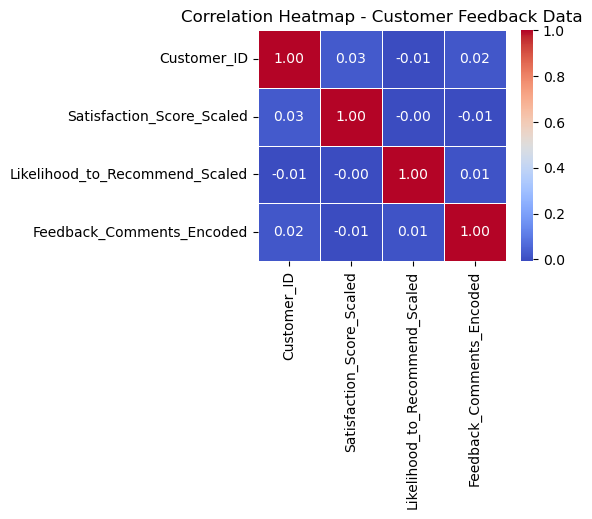

Available columns in transaction_data: Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Transaction_Type',
       'Transaction_Amount_Scaled'],
      dtype='object')
Available columns in customer_feedback_data: Index(['Customer_ID', 'Satisfaction_Score_Scaled',
       'Likelihood_to_Recommend_Scaled', 'Feedback_Comments_Encoded'],
      dtype='object')


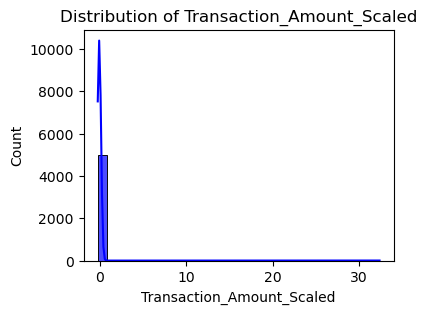

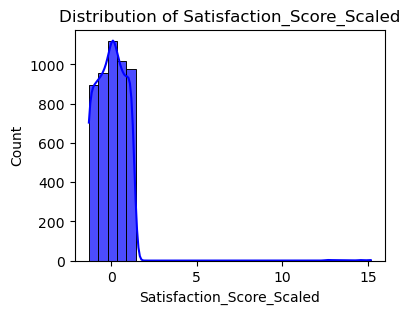

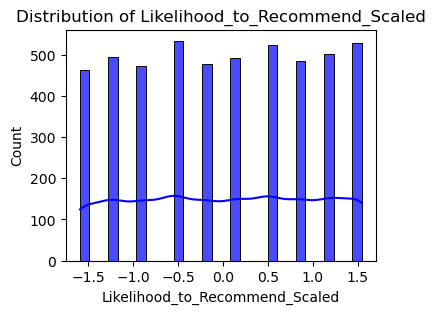

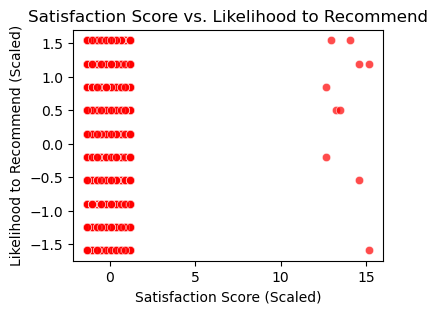

In [79]:
 #🔹 1️⃣ Correlation Matrix (Heatmap)
plt.figure(figsize=(4, 3))
sns.heatmap(customer_feedback_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Customer Feedback Data")
plt.show()

# 🔹 2️⃣ Distributions (Histograms & KDE Plots)
# First, verify the correct column names
print("Available columns in transaction_data:", transaction_data.columns)
print("Available columns in customer_feedback_data:", customer_feedback_data.columns)

# Adjusted feature list based on column verification
features_to_plot = ['Transaction_Amount_Scaled', 'Satisfaction_Score_Scaled', 'Likelihood_to_Recommend_Scaled']

for feature in features_to_plot:
    if feature in transaction_data.columns:
        data = transaction_data
    elif feature in customer_feedback_data.columns:
        data = customer_feedback_data
    else:
        print(f"Skipping {feature} - Not found in datasets.")
        continue  # Skip if column not found

    plt.figure(figsize=(4, 3))
    sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# 🔹 3️⃣ Scatterplots (Feature Relationships)
if 'Satisfaction_Score_Scaled' in customer_feedback_data.columns and 'Likelihood_to_Recommend_Scaled' in customer_feedback_data.columns:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=customer_feedback_data['Satisfaction_Score_Scaled'], 
                    y=customer_feedback_data['Likelihood_to_Recommend_Scaled'], 
                    alpha=0.7, color='red')
    plt.title("Satisfaction Score vs. Likelihood to Recommend")
    plt.xlabel("Satisfaction Score (Scaled)")
    plt.ylabel("Likelihood to Recommend (Scaled)")
    plt.show()
else:
    print("Skipping scatterplot - Required columns not found in customer_feedback_data.")

In [ ]:
#MS2

In [81]:
desktop_path = "C:\\Users\\kuros\\OneDrive\\Desktop\\"

transaction_data.to_csv(desktop_path + "transaction_data_cleaned.csv", index=False)
customer_feedback_data.to_csv(desktop_path + "customer_feedback_data_cleaned.csv", index=False)
product_offering_data.to_csv(desktop_path + "product_offering_data_cleaned.csv", index=False)

print("Files have been saved to your desktop successfully!")

Files have been saved to your desktop successfully!
